# Wykres DFT przy użyciu np.fft

In [1]:
import numpy as np
import matplotlib.pyplot as plt

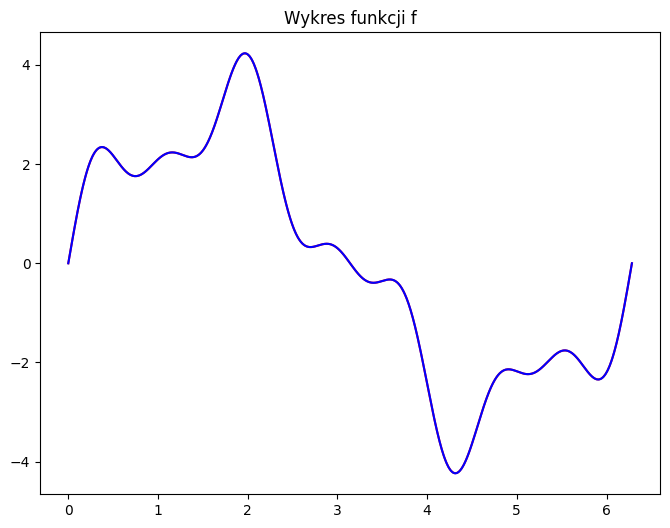

In [9]:
def samples(f, samplingRate):
    x = np.linspace(0, 2*np.pi, samplingRate)
    a = f(x)
    return (a, x)


def f(t):
    value = 3*np.sin(t)
    value += np.sin(4*t)
    value += 0.5* np.sin(7*t)
    return value

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (8, 6))
plt.title("Wykres funkcji f")
plt.plot(x, a, 'r')
plt.plot(xDraw, aDraw, 'b')

plt.show()

/home/sarcoramphus/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


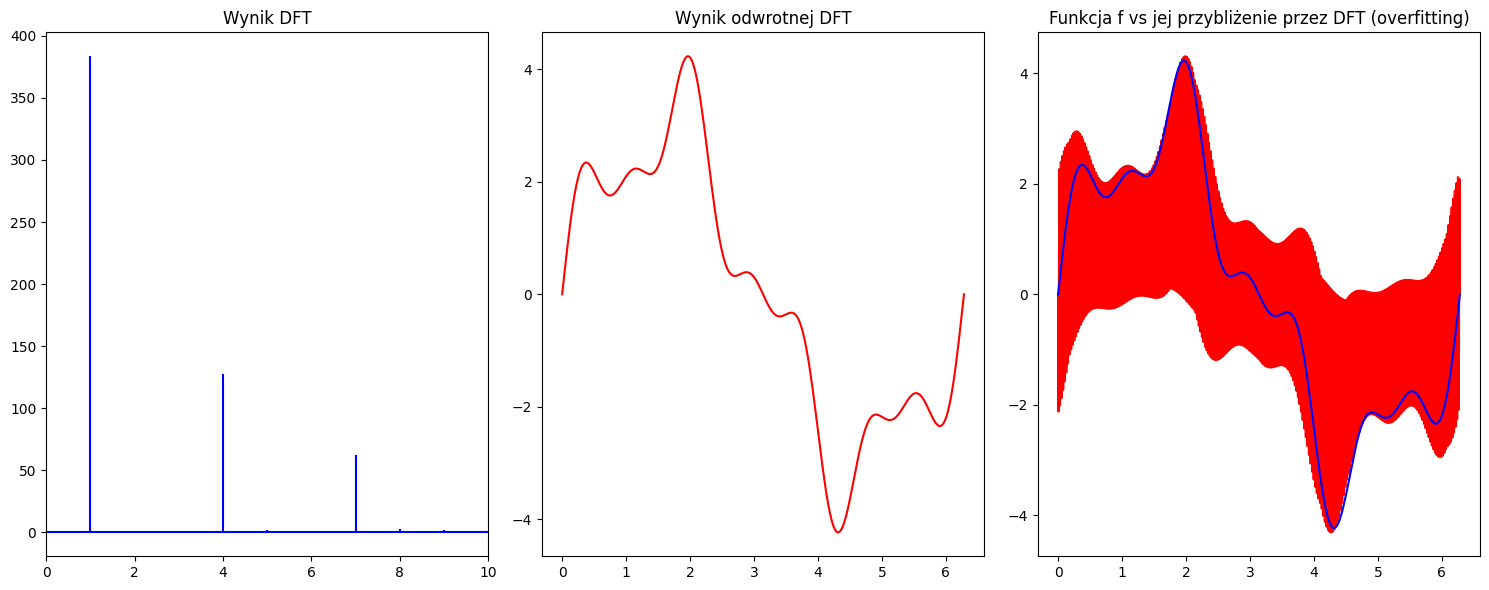

In [5]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (15, 6))

plt.subplot(131)
plt.title("Wynik DFT")
plt.stem(freq, np.abs(A), 'b', markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(132)
plt.title("Wynik odwrotnej DFT")
plt.plot(x, np.fft.ifft(A), 'r')

plt.subplot(133)
plt.title("Funkcja f vs jej przybliżenie przez DFT (overfitting)")
aprox = [np.sum(A * np.exp(x*1j*np.arange(len(a))))/len(a) for x in xDraw]
plt.plot(xDraw, aprox, 'r')
plt.plot(xDraw, aDraw, 'b')

plt.tight_layout()
plt.show()

# Implementacja FFT

In [6]:
def fft(a):
    if(len(a) == 1):
        return np.array(a)
    else:
        even = a[::2]
        odd = a[1::2]
        dft1 = fft(even) + np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * fft(odd)
        dft2 = fft(even) - np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * fft(odd)
        return np.concatenate( (dft1, dft2) )

In [7]:
def swapImRe(x):
    return np.imag(x) + 1j*np.real(x)

def ifft(A):
    a = swapImRe(A)
    a = fft(a)
    a = swapImRe(a)
    a /= len(a)
    return a

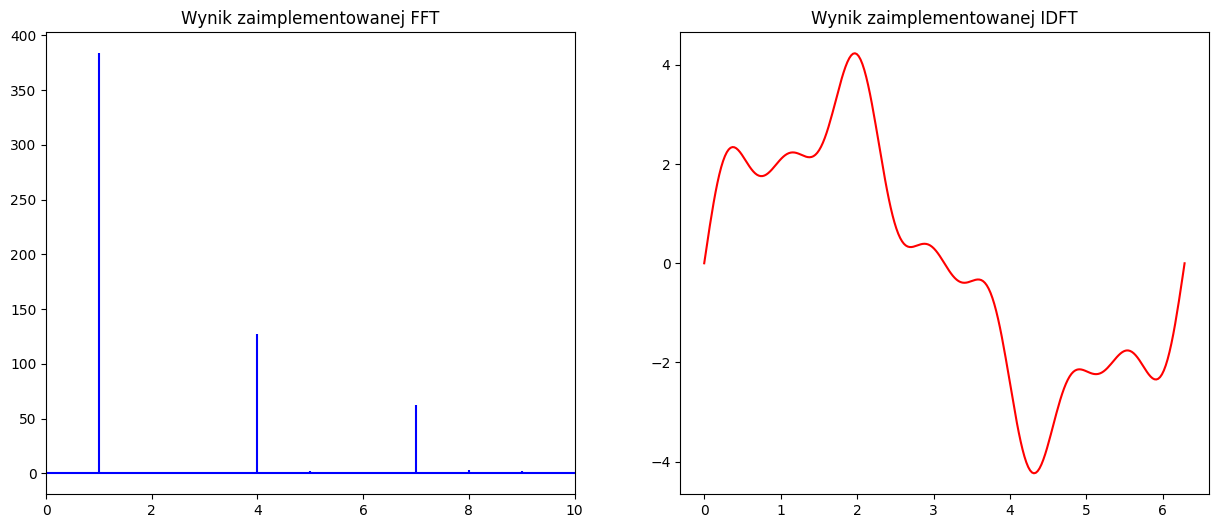

In [8]:
A = fft(a)

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.title("Wynik zaimplementowanej FFT")
plt.stem(freq, np.abs(A), 'b', markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(122)
plt.title("Wynik zaimplementowanej IDFT")
plt.plot(x, ifft(A), 'r')

plt.show()

TODO: dlaczego są wartości urojone w IDFT i przy odcięciu ich wygląda ok, a po abs nie